# Нахождение решения задачи Коши методом Рунге-Кутта второго порядка
*подготовил: Глазков Даниил 207*

Задача u' = integral( f( t ) dt )

Начальное значение N = 20

Отрезок [0, 1]

## Описание алгоритма

Алгоритм нахождения решение реализуется слудующим образом: 

    1) Производиться разбиение отрезка [0, 1] на равные промежутки длинной 1/N, полученные значение записываются в mas_x

    2) По разбиению отрезка строиться функция у(в зависимояти от параметра alpha), результат записывается в mas_y (alpha = 1/2) или в mas_y_1(alpha=1). Для этого описана функция Int_res (t_zero, t, splitting) для подсчета интеградла (t_zero - начальная точка отрезка итегрирования, t - конечная точка отрезка интегрирования, splitting - разбиение). Формула: y[i + 1] = y [i] + (1 - alpha) * f(x[ i ], y[ i ]) + alpha * f(x[ i ] + h/2, y[ i ] + h/2)

    3) По разбиению отрезка строиться функция u(в зависимояти от параметра alpha), результат записывается в mas_u (alpha = 1/2) или в mas_u_1(alpha=1). Для этого используем формулу u[ i + 1] = u(x[ i ] + h) = u[ i ] + u'[ i ] ... - разложение по формуле Тейлора.

    4) Далее расчитываются погрешности апроксимации(norma_w) и решения(norma_z). 

Ниже будет представлен полный алгоритм для значение параметра N = 20 написанный на языке Python.

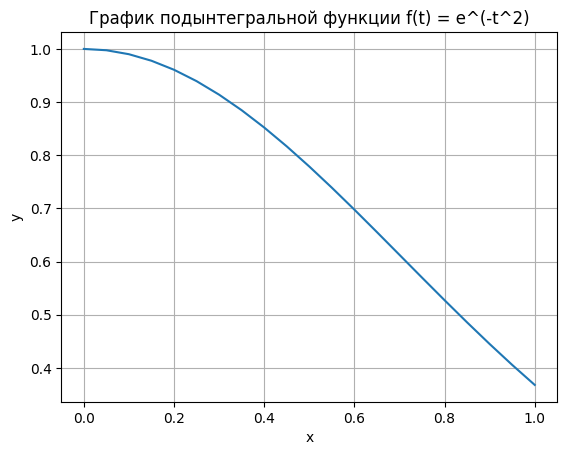

In [14]:
import matplotlib.pyplot as plt
import numpy as np

N = 20 

CONST_SPLITTING = N ** 2 # разбиение для подсчтета интеграла

h = 1 / N

N = N + 1

l_zero = 0 # Начальная точнка отрезка 
l = 1 # Конченая точка отрезка

x = np.linspace(l_zero, l, N)
y = np.exp(-x ** 2) # e^(-t^2)

# Для наглядности, построим график подынтегральной функции f(t) = e^(-t^2)

plt.title("График подынтегральной функции f(t) = e^(-t^2)")
plt.xlabel("x") # ось абсцисс
plt.ylabel("y") # ось ординат
plt.grid()      # включение отображение сетки
plt.plot(x, y)  # построение графика

plt.show()

In [15]:
def Int_res (t_zero, t, splitting):
    # Функция подсчета значения интеграла методом прямоугольников
    # t_zero - начальная точка отрезка итегрирования
    # t - конечная точка отрезка интегрирования
    # splitting - разбиение
    x = np.linspace(t_zero, t, splitting, True)
    y = np.exp(-x ** 2)

    Int_sum = 0
    for i in range(splitting):
        Int_sum = Int_sum + y[i] * (t - t_zero) / splitting  
    return Int_sum # u'= integral(f(t))

In [16]:
print("Значение ингерала при CONST_SPLITTING = N равно", Int_res(l_zero, l, N))
print("Значение ингерала при CONST_SPLITTING = N^2 равно", Int_res(l_zero, l, CONST_SPLITTING))

Значение ингерала при CONST_SPLITTING = N равно 0.7436836409230089
Значение ингерала при CONST_SPLITTING = N^2 равно 0.7466665376136085


Подсчет значений интегрла будет производиться более точныйм методом, чтоб невелировать погрешность связанную с подсчетом интеграла. 

In [17]:
mas_y = np.zeros(N) # массив значений у при alpha = 1/2
mas_y_1 = np.zeros(N) #  массив значений у при alpha = 1

mas_x = np.linspace(l_zero, l, N)

# Задаем нулевое значение функции
mas_y[0] = 0 
mas_y_1[0] = 0

# Задаем оставшиеся N - 1 значений функии 
for i in range(N - 1):
    mas_y[i + 1] = mas_y[i] + ((Int_res(l_zero, mas_x[i], CONST_SPLITTING) + Int_res(l_zero, mas_x[i + 1],  CONST_SPLITTING)) / 2) * h 
    mas_y_1[i + 1] = mas_y_1[i] + Int_res(l_zero, mas_x[i] + h / 2, CONST_SPLITTING) * h 


In [18]:
mas_u = np.zeros(N) # массив значений u при alpha = 1/2
mas_u_1 = np.zeros(N) # массив значений u при alpha = 1

# Задаем нулевое значение функции
mas_u[0] = 0
mas_u_1[0] = 0

# Задаем оставшиеся N - 1 значений функии 
for i in range(N - 1):
    mas_u[i + 1] = mas_u[i] + Int_res(l_zero, mas_x[i], CONST_SPLITTING) * h + h * h * np.exp(- mas_x[i] ** 2) / 2
    mas_u_1[i + 1] = mas_u_1[i] + Int_res(l_zero, mas_x[i], CONST_SPLITTING) * h + h * h * np.exp(- mas_x[i] ** 2) / 2  


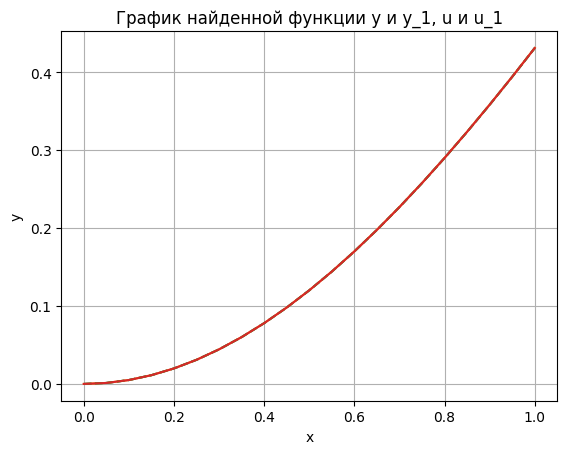

Значение х  Значение у    Значение у_1   Значение u    Значение u_1
 0.00000   0.0000000000   0.0000000000   0.0000000000   0.0000000000 
 0.05000   0.0012489578   0.0012497393   0.0012500000   0.0012500000 
 0.10000   0.0049895969   0.0049927111   0.0049947945   0.0049947945 
 0.15000   0.0112033074   0.0112102709   0.0112157193   0.0112157193 
 0.20000   0.0198593819   0.0198716538   0.0198819670   0.0198819670 
 0.25000   0.0309154701   0.0309344316   0.0309510442   0.0309510442 
 0.30000   0.0443182002   0.0443451356   0.0443693964   0.0443693964 
 0.35000   0.0600039515   0.0600400314   0.0600731847   0.0600731847 
 0.40000   0.0778997586   0.0779460263   0.0779891953   0.0779891953 
 0.45000   0.0979243279   0.0979816879   0.0980358611   0.0980358611 
 0.50000   0.1199891405   0.1200583510   0.1201243717   0.1201243717 
 0.55000   0.1439996184   0.1440812868   0.1441598453   0.1441598453 
 0.60000   0.1698563287   0.1699509094   0.1700425393   0.1700425393 
 0.65000   0.197456198

In [19]:
# Для нагляжности построим графики функций и выведем их знаяения 
plt.title("График найденной функции y и y_1, u и u_1")
plt.xlabel("x") # ось абсцисс
plt.ylabel("y") # ось ординат
plt.grid()      # включение отображение сетки
plt.plot(mas_x, mas_u, '--')  # построение графика для alpha = 1/2
plt.plot(mas_x, mas_u_1)  # построение графика для alpha = 1
plt.plot(mas_x, mas_y, '--')  # построение графика для alpha = 1/2
plt.plot(mas_x, mas_y_1)  # построение графика для alpha = 1
plt.show()

print("Значение х  Значение у    Значение у_1   Значение u    Значение u_1")
for i in range(N):
    print(" %.5f " % mas_x[i], " %.10f " % mas_y[i], " %.10f " % mas_y_1[i], " %.10f " % mas_u[i], " %.10f " % mas_u_1[i] )

Функции накладываются друг на дргуа, так как масштаб не позволяют отобразить столь маленькие отличия в значениях.
Для того, чтобы оценить различия, найдем погрешности и посмотрим уже на них.

In [20]:
mas_w = np.zeros(N - 1) # функция погрешности аппроксимации при alpha = 1/2
mas_w_1 = np.zeros(N - 1) # функция погрешности аппроксимации при alpha = 1

for i in range(N - 1):
    mas_w_1[i] = np.abs((mas_u[i + 1] - mas_u[i]) / h  - Int_res(l_zero, mas_x[i] + h / 2, CONST_SPLITTING))
    mas_w[i] = np.abs((mas_u_1[i + 1] - mas_u_1[i]) / h - (Int_res(l_zero, mas_x[i], CONST_SPLITTING) + Int_res(l_zero, mas_x[i + 1], CONST_SPLITTING)) / 2)

norma_w = np.max(mas_w) # погрешность аппроксимации при alpha = 1/2
norma_w_1 = np.max(mas_w_1) # погрешность аппроксимации при alpha = 1


In [21]:
mas_z = np.zeros(N) # функция погрешности решения при alpha = 1/2
mas_z_1 = np.zeros(N) # функция погрешности решения при alpha = 1

for i in range(N ):
    mas_z[i] = np.abs(mas_u[i] - mas_y[i])
    mas_z_1[i] = np.abs(mas_u_1[i] - mas_y_1[i])

norma_z = np.max(mas_z) # погрешность решения при alpha = 1/2
norma_z_1 = np.max(mas_z_1) # погрешность решения при alpha = 1


In [22]:
# alpha = 1/2
print("Погрешность аппроксимации при значении параматра alpha = 1/2: %.10f" % norma_w)
print("Погрешность решения при значении параматра alpha = 1/2: %.10f\n" % norma_z)

# alpha = 1
print("Погрешность аппроксимации при значении параматра alpha = 1: %.10f" % norma_w_1)
print("Погрешность решения при значении параматра alpha = 1: %.10f" % norma_z_1)

Погрешность аппроксимации при значении параматра alpha = 1/2: 0.0005425122
Погрешность решения при значении параматра alpha = 1/2: 0.0003951828

Погрешность аппроксимации при значении параматра alpha = 1: 0.0002747028
Погрешность решения при значении параматра alpha = 1: 0.0001975599


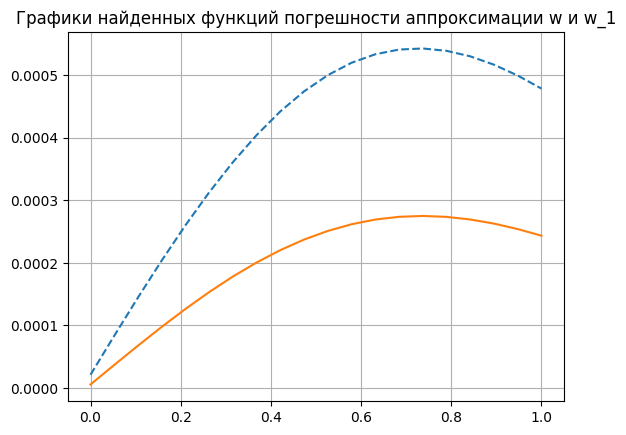

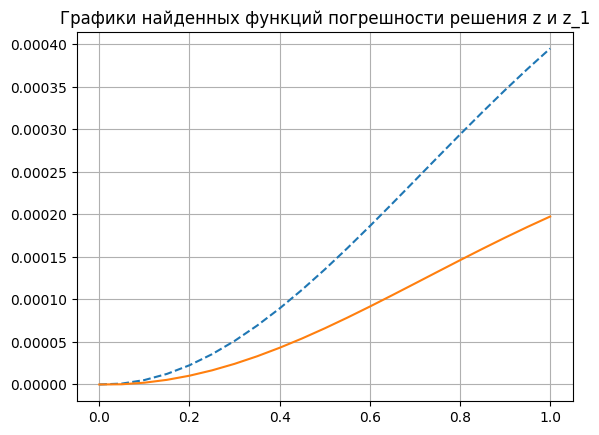

In [23]:
# Для наглядности выведем графики функций погрешности
x_w = np.linspace(l_zero, l, N - 1)
plt.title("Графики найденных функций погрешности аппроксимации w и w_1")
plt.grid()      # включение отображение сетки
plt.plot(x_w, mas_w, '--')  # построение графика alpha = 1/2
plt.plot(x_w, mas_w_1)  # построение графика alpha = 1
plt.show()

x_z = np.linspace(l_zero, l, N)
plt.title("Графики найденных функций погрешности решения z и z_1")
plt.grid()      # включение отображение сетки
plt.plot(x_z, mas_z, '--')  # построение графика alpha = 1/2
plt.plot(x_z, mas_z_1)  # построение графика alpha = 1
plt.show()

Голубым пунктиром изображены функции погрешностей для параметра alpha = 1/2

Оранжевым цветои изображены функции  погрешностей для параметра alpha = 1

#### Выводы

Из полученных результатов следует:

    1) Погрешность меньше при использовании праметра alpha = 1. Основной причиной этого является то, что интеграл в данном случае считается только единожды.
    
    2) Погрешности стремяться к нулю со скороcтью h^2. Данныая закономерость будет подтверждена далее, но этот вывод важен для использования данного метода.

#### Решение

In [24]:
# Решением является более точный вариант (alpha = 1)
print("Значение х   Значение у")
for i in range(N):
    print(" %.5f  " % mas_x[i], " %.10f " % mas_y_1[i] )
    
print("\nПогрешность =  %.10f" % norma_z_1)

Значение х   Значение у
 0.00000    0.0000000000 
 0.05000    0.0012497393 
 0.10000    0.0049927111 
 0.15000    0.0112102709 
 0.20000    0.0198716538 
 0.25000    0.0309344316 
 0.30000    0.0443451356 
 0.35000    0.0600400314 
 0.40000    0.0779460263 
 0.45000    0.0979816879 
 0.50000    0.1200583510 
 0.55000    0.1440812868 
 0.60000    0.1699509094 
 0.65000    0.1975639952 
 0.70000    0.2268148891 
 0.75000    0.2575966761 
 0.80000    0.2898022977 
 0.85000    0.3233255946 
 0.90000    0.3580622609 
 0.95000    0.3939106982 
 1.00000    0.4307727614 

Погрешность =  0.0001975599


## Исследование поведения решения при сгушающихся сетках и исследование на сходимость. 

Для исследования напишем функцию, которая изменяет массив решений и возвращает значение погрешности при заданном N Res_z(N_f, mas_x_f). Возьмем за основу алгоритм описанный выше, исключив из него поэтапный вывод.

    N_f - значение N, передаваемое в функцию
    mas_x_f - разбиение отрезка [0, 1], передаваемое в функцию
    
Далее вывозвем эту функцию для некоторых N и проанализируем полученный результат.

In [25]:
def Res_z(N_f, mas_x_f):
    
    CONST_SPLITTING = N_f ** 2 # разбиение для подсчтета интеграла
    h = 1 / N_f
    N_f = N_f + 1
    l_zero = 0 # Начальная точнка отрезка 
    l = 1 # Конченая точка отрезка
    

    # Задаем нулевое значение функции
    mas_y_f[0] = 0

    # Задаем оставшиеся N - 1 значений функии 
    for i in range(N_f - 1):
        mas_y_f[i + 1] = mas_y_f[i] + Int_res(l_zero, mas_x_f[i] + h / 2, CONST_SPLITTING) * h 

    # Задаем нулевое значение функции
    mas_u_f[0] = 0

    # Задаем оставшиеся N - 1 значений функии 
    for i in range(N_f - 1):
        mas_u_f[i + 1] = mas_u_f[i] + Int_res(l_zero, mas_x_f[i], CONST_SPLITTING) * h + h * h * np.exp(- mas_x_f[i] ** 2) / 2 
    
    # Получаем функцию погрешности решения
    for i in range(N_f):
        mas_z_f[i] = np.abs(mas_u_f[i] - mas_y_f[i])

    norma_z_f = np.max(mas_z_f) # погрешность решения

    return norma_z_f


In [26]:
len = 101
mas_z = np.zeros(len) # Массив значений погрешности
mas_N = np.zeros(len) # Массив значений N
mas_y = np.zeros(len) # Массив значений функции в точке х = 1
mas_y_f = np.zeros(N - 1 + len)
mas_u_f = np.zeros(N - 1 + len) 
mas_z_f = np.zeros(N - 1 + len)

# Вывызваем функцию для набора N, N + 1, ... , N + len - 1.
for i in range(len):
    mas_N[i] = N - 1 + i
    mas_x_f = np.linspace(l_zero, l, N + i)
    mas_z[i] = Res_z(N - 1 + i, mas_x_f)
    mas_y[i] = mas_y_f[N - 1 + i]


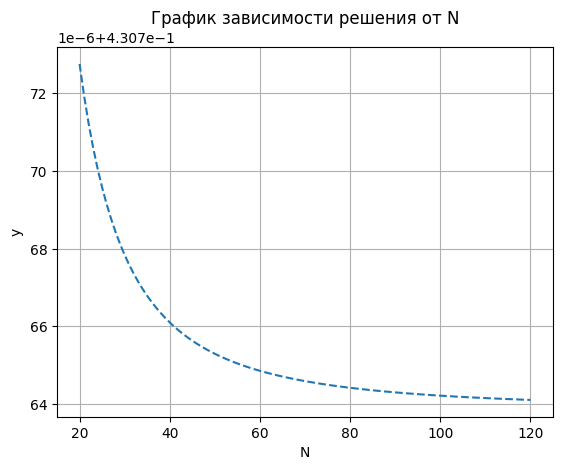

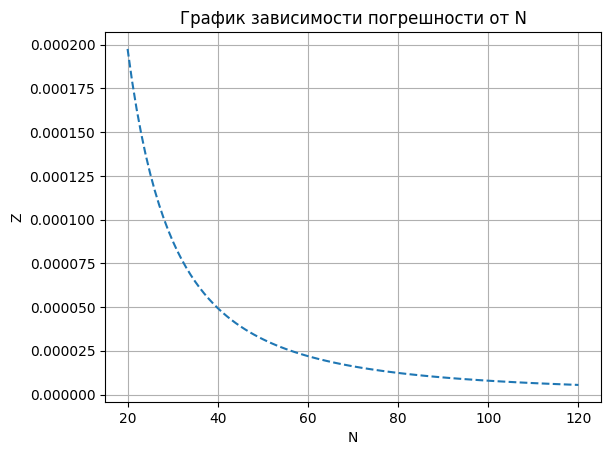

In [27]:
# Для нагляжности построим график функции и выведем её знаяения 
plt.title("График зависимости решения от N")
plt.xlabel("N") # ось абсцисс
plt.ylabel("y") # ось ординат
plt.grid()      # включение отображение сетки
plt.plot(mas_N, mas_y, '--')  # построение графика
plt.show()

# Для нагляжности построим график функции и выведем её знаяения 
plt.title("График зависимости погрешности от N")
plt.xlabel("N") # ось абсцисс
plt.ylabel("Z") # ось ординат
plt.grid()      # включение отображение сетки
plt.plot(mas_N, mas_z, '--')  # построение графика
plt.show()

In [28]:
print("значение N    Значение у   Погрешность решения")
for i in range(len):
    print("   ", (N + i - 1), "      %.10f" % mas_y[i], "    %.10f" % mas_z[i])

значение N    Значение у   Погрешность решения
    20       0.4307727614     0.0001975599
    21       0.4307719420     0.0001791945
    22       0.4307712303     0.0001632756
    23       0.4307706083     0.0001493873
    24       0.4307700615     0.0001371984
    25       0.4307695784     0.0001264425
    26       0.4307691495     0.0001169036
    27       0.4307687669     0.0001084046
    28       0.4307684242     0.0001007999
    29       0.4307681161     0.0000939681
    30       0.4307678381     0.0000878080
    31       0.4307675864     0.0000822344
    32       0.4307673578     0.0000771750
    33       0.4307671495     0.0000725686
    34       0.4307669592     0.0000683626
    35       0.4307667849     0.0000645119
    36       0.4307666249     0.0000609776
    37       0.4307664776     0.0000577260
    38       0.4307663418     0.0000547277
    39       0.4307662162     0.0000519571
    40       0.4307660998     0.0000493917
    41       0.4307659919     0.0000470116
    42 

#### Вывод

Решение уменьшается при росте N, стремясь к более точному результату. Это можно увидеть на графике и в таблице значений. Хоть изменения незначительный, но не заметить различия невозможно.

С ростом N погрешность уменьшается. Как видно из графика эта зависимость нелинейная. При стремленнии N к бесконености погрешность стремиться к нулю или же h = 1/N, тогда при h -> 0 погрешность решений стермиться к нулю со скоростью h^2 (зависимость получена на основе лекционного материала и графика). Следовательно, можно сделать вывод, что сходимость однозначно присутствует. 

#### Решение

    а) При увеличении параметра N получаемые значение уменьшаются в пределах погрешности стремясь достичь более точного результата.
    б) Будет сходится.